# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [7]:
#Импортирование библиотек, загрузка файла
import pandas as pd              #Импорт библиотеки Pandas
import numpy as np               #Импорт библиотеки Numpy
import seaborn as sns            #Импорт библиотеки Seaborn
import matplotlib.pyplot as plt  #Импорт библиотеки Matplotlib


data = pd.read_csv('C:/Project_2/telecom_users.csv')  #Открытие файла с данными
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [8]:
#Проверка пропущенных значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [10]:
# Приведение числовых данных к соответсвующим типам для получения общей статистической информации.
new_type_list = []
for i in data['TotalCharges']:
    try:
        i = float(i)
    except:
        i = 0
    new_type_list.append(i)

data['TotalCharges'] = new_type_list

In [11]:
#Информация о типах данных
data.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
#Получение базовых статистик
data.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213,2294.221559
std,2035.705666,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,0.000000,18.250000,0.000000
25%,1777.250000,0.000000,9.000000,35.650000,401.587500
50%,3546.500000,0.000000,29.000000,70.400000,1408.575000
75%,5291.750000,0.000000,56.000000,89.900000,3841.500000
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


In [13]:
# Полчуение статистики по нецифровым данным
data.describe(include=[np.object])

C:\Users\vikto\AppData\Local\Temp/ipykernel_2748/1906838510.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include=[np.object])


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7010-BRBUU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


In [15]:
# Посчитаем процент оттока клиентов за данный период
count = data.describe(include=[np.object]).loc['count','Churn']
Churn = count - data.describe(include=[np.object]).loc['freq','Churn']
print(f'Процент оттока клиентов составляет {Churn * 100 // count}%')

Процент оттока клиентов составляет 26%


C:\Users\vikto\AppData\Local\Temp/ipykernel_2748/3315356386.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  count = data.describe(include=[np.object]).loc['count','Churn']
C:\Users\vikto\AppData\Local\Temp/ipykernel_2748/3315356386.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Churn = count - data.describe(include=[np.object]).loc['freq','Churn']


Выводы на основе имеющихся данных:

Пропущенных данных не обнаружено, за исключением предиктора TotalCharges. Все записи идентичны, указаны без ошибок и иных формулировок.
Медианный месячный платеж среди всех абонентов составляет 70.4 у.е.
Большинство клиентов - мужчины.
Количество пенсионеров меньше чем 25%.
Медианное количество месяцев подписки составляет чуть больше 29. Максимальное - 72.
Большинство клиентов не состоят в браке а так же не имеют иждивенцев.
Интернет провайдером большинства клиентов является Fiber optic.
Большинство клиентов не пользуются дополнительными услугами.
Больше половины клиентов имеют тип контракта Month-to-month.
Большая часть клиентов использует безбумажный биллинг.
Electronic check является приоритетным способом оплаты.
Процент оттока клиентов составил 26%

# 2. Исследование зависимостей и формулирование гипотез

2.1 Приводим все данные к одному типу.

In [16]:
# Удаление признака с ID клиента
del data['customerID']

In [17]:
# Для разбиения на классы воспользуемся автоматическим алгоритмом:
# Данный алгоритм можно применять при большом количестве признаков.
def classificator(data_frame):  #Определяем функицю
    for feature in list(data_frame.columns):      # Задаем итератор в рамках названий колонок
        if data_frame[feature].dtype == 'O':      # Условие для признаков соответсвующих типу даных "Objekt"
            data_frame[feature].replace(['Yes', 'No'], [1, 0], inplace=True)   # Замена значений 'Yes' и 'No' на 0 и 1
            for iteration, value in enumerate(list(data_frame[feature].unique())):  # Итератор в рамках уникальных значений признака
                if type(value) == str:         # Условие для замены нецифровых значений
                    if data_frame[feature].nunique() > 2:  # Условие компенсации порядкового номера для 
                        iteration += 1                     # тех признаков, в которых не было значений 'Yes' и 'No'
                    data_frame[feature].replace(value, iteration, inplace=True)  # Замена всех нецифровых значений на соответсвущй порядковый номер 
data_new = data.copy()
classificator(data_new)
data_new

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,0,0,1,1,72,1,1,0,1,...,1,1,1,1,1,0,1,24.10,1734.65,0
1,4528,1,0,0,0,44,1,0,2,0,...,1,0,1,0,2,1,1,88.15,3973.20,0
2,6344,1,1,1,0,38,1,1,2,0,...,0,0,0,0,2,1,2,74.95,2869.85,1
3,6739,0,0,0,0,4,1,0,3,0,...,0,0,0,1,2,1,3,55.90,238.50,0
4,432,0,0,0,0,2,1,0,3,1,...,1,0,0,0,2,0,3,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0,0,1,0,1,1,0,2,1,...,0,0,1,1,2,1,3,95.00,95.00,1
5982,5191,1,0,1,1,23,1,1,3,1,...,1,1,1,1,1,1,1,91.10,2198.30,0
5983,5226,0,0,1,1,12,1,0,0,1,...,1,1,1,1,2,1,3,21.15,306.05,0
5984,5390,0,1,0,0,12,1,1,2,0,...,1,0,1,1,2,1,3,99.45,1200.15,1


2.2 Проверяем наличие связей между признаками и целевым значением

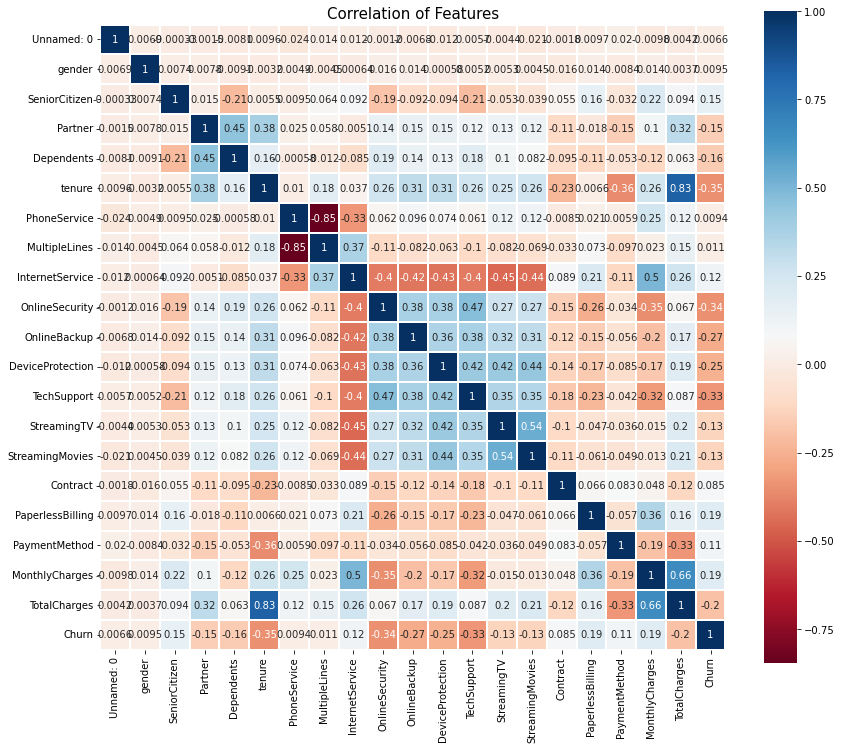

In [18]:
#Посмотрим на корреляционные связи между признаками
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1, size=15)
sns.heatmap(data_new.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True, fmt='.2g')
plt.show()

In [19]:
#Поскольку безымянный пердиктор не имеет существенной зависимости с целевой переменной, можем его удалить.
del data['Unnamed: 0']

С целевой переменной Churn имеется слабая корреляционная связь у признаков: Tenure, OnlineSecurity, TechSupport, OnlineBackup, DeviceProtection, MonthlyCharges, PaperlessBilling.

Наличие корреляционной связи этих признаков с целевой переменной говорит нам о том что существует вероятность того, что клиент вероятно откажется от услуг связи, если у него не активированы услуги по онлайн безопасности, технической поддержке, защиты устройства и резервному копированию данных. Так же существует зависимость оттока и использования безбумажного биллинга. Зависимости между оттоком, количеством месяцев подписки и меячной платой являеются следственными связями.

In [20]:
# Посмтотрим сколько процентов клиентов пользовались услугами безопасности
security_data = data_new[['Churn', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection', 'PaperlessBilling']].groupby('Churn').agg('sum')
security_data.iloc[0,:] = security_data.iloc[0,:]//((data_new.Churn.count()-data_new.Churn.sum())/100)
security_data.iloc[1,:] = security_data.iloc[1,:]//(data_new.Churn.sum()/100)
security_data

,OnlineSecurity,TechSupport,OnlineBackup,DeviceProtection,PaperlessBilling
Churn,,,,,
0,60,60,64,63,53
1,21,22,34,35,74


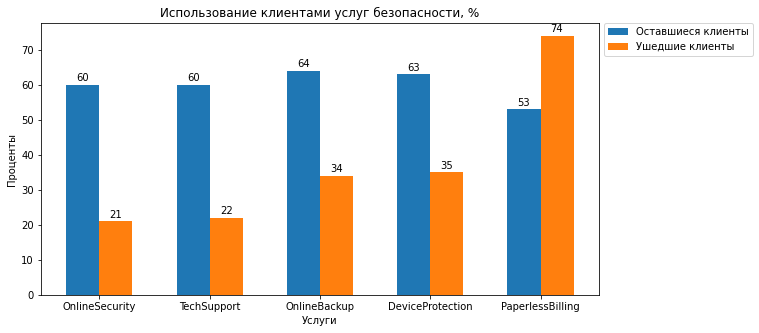

In [21]:
# Посмотрим на эти значения на графике
labels = security_data.columns  # Значения подписей по x
percent_0 = security_data.iloc[0,:]  # Список процентов оставшихся клиентов
percent_1 = security_data.iloc[1,:]  # Список процентов ушедших клиентов

x = np.arange(len(labels))  # Список координат столбцов по x
width = 0.3  # Переменная для ширины столбцов

fig, ax = plt.subplots(figsize=(10,5))  # Определение фигуры и осей
rects1 = ax.bar(x - width/2, percent_0, width, label='Оставшиеся клиенты')  # Определение колонок для данных об отсавшихся клиентах
rects2 = ax.bar(x + width/2, percent_1, width, label='Ушедшие клиенты')   # Определение колонок для данных об ушедших клиентах

# Указание подписей для осей, таблицы, легенды
ax.set_ylabel('Проценты')
ax.set_xlabel('Услуги')
ax.set_title('Использование клиентами услуг безопасности, %')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

# Определение функции для отображения столбцов с аннотациями
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        # Задание параметров для аннотаций
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height), # Получение точек координат для текста
                    xytext=(0, 2),    # Высота текста над столбцами
                    # Расположение текста относительно столбцов
                    textcoords="offset points",  
                    ha='center', va='bottom')

autolabel(rects1)  # Выполнение функции для первой группы данных
autolabel(rects2)  # Выполнение функции для второй группы данных

plt.show()

Особая разница заметна у соотношения клиентов услуг OnlineSecurity и TechSupport. Оставшиеся клиенты пользовались этими услугами в 3 раза чаще, услуги OnlineBackup и DeviceProtection пользовались спросом у данной категории клиентов в почти 2 раза чаще. С бесбумажным биллингом картина выглядит иначе - на 21% клиентов больше пользовались электронным счётом в группе оттока.

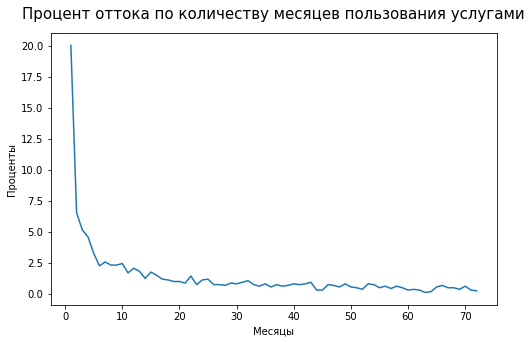

In [22]:
# Посмотрим на график зависимости процента ушедших клиентов от количества месяцев использования услуг
percent_churn = data_new[data_new.Churn==1][['Churn','tenure']].groupby('tenure').sum()
percent_churn.Churn = list(map(lambda x: x / (data_new.Churn.sum() / 100), percent_churn.Churn))
plt.figure(figsize=(8,5))
plt.title('Процент оттока по количеству месяцев пользования услугами', y=1.03, size=15)
plt.xlabel('Месяцы')
plt.ylabel('Проценты')
plt.plot(percent_churn.index, percent_churn.Churn)
plt.show()

Больше 20% клиентов ушли в первые месяцы пользования услугами.

C:\Users\vikto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


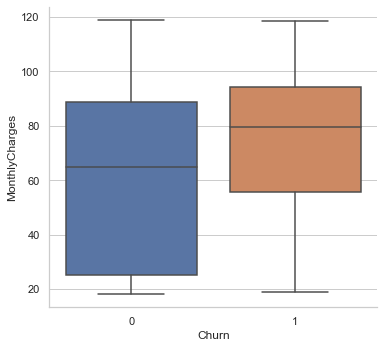

In [23]:
# Посмотрим как распределены дынные о месячной плате за связь среди 2 групп клиентов
sns.set(style="whitegrid") 
ax = sns.catplot('Churn', 'MonthlyCharges', data=data_new, aspect=1.1, height=5, kind='box') 
y_0 = data_new.MonthlyCharges[data_new.Churn==0].median()
y_1 = data_new.MonthlyCharges[data_new.Churn==1].median()
ax = sns.lineplot(x=[-0.3,0.3], y=y_0)
ax = sns.lineplot(x=[0.7,1.3], y=y_1)


Медианное значение группы оттока оказалось выше чем значение у группы активных клиентов, несмотря на то что большинство ушедших клиентов не пользовалось улсугами безопасности. Возможно, большинство этих клиентов посчитало, что переплачивает за услуги.

Вывод по данным проведённого анализа

Одной из основных причин оттока клиентов является отсутствие подписки на услуги безопасности и использование электронных счетов.
По причине отсутствия подписок на услуги безопасности, ушедшие клиенты переплачивали за месячное пользование связью.
Около 20% ушедших клиентов пользовалась услугами около месяца. Больше половины клиентов из группы оттока ушли пользуясь связью менее года.

# 3. Построение моделей для прогнозирования оттока

In [26]:
from sklearn.neighbors import KNeighborsClassifier  #Импорт классификатора "K-ближайших соседей"
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier 
#Импорт классификатора "Градиентный бустинг" и "Рандомный лес"
from sklearn.linear_model import LogisticRegression  #Импорт классификатора "Логистическая регрессия"
from sklearn.svm import SVC  #Импорт классификатора "Метод опорных векторов"

#Импорт методов автоматической обработки данных
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

#Импорт метрик качества классификации
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score

In [28]:
# Параметры базовых алгоритмов

knn_params = {'n_neighbors' : np.arange(1, 10, 1)}  # Параметры для классификатора KNeighborsClassifier

gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)}   # Параметры для классификатора GradientBoostingClassifier

rfc_params = {'n_estimators': range(10, 100, 10),  # Параметры для классификатора RandomForestClassifier
              'min_samples_leaf': range(1, 7)}

svc_params = {'kernel': ['linear', 'rbf'], 
'C': np.arange(0.1, 1, 0.2)}                       # Параметры для классификатора SVC

lr_params = {'C': np.arange(0.2, 1, 0.1)} # Параметры для классификатора LogisticRegression

skf = StratifiedKFold(n_splits=8) # Параметры для кросс-валидации

In [29]:
# Разделение данных на тренировочные и тестовые
y = data_new['Churn']
x = data_new[['tenure', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection', 'MonthlyCharges', 'PaperlessBilling']]

In [30]:
# Посмотрим на балансировку целевого признака
print('Положительных значений -', y.sum())
print('Отрицательных значений -', y.count() - y.sum())

Положительных значений - 1587
Отрицательных значений - 4399


Положительных значений почти в 3 раза меньше чем отрицательных. При делении данных на тестовые и тренировочные применим стратификацию по y.

In [31]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3,  stratify=y, random_state=17)

In [32]:
# GridSearch для каждой из моделей

knn = KNeighborsClassifier()                       # Определение объекта классификатора KNeighborsClassifier
gbc = GradientBoostingClassifier(random_state=17)  # Определение объекта классификатора GradientBoostingClassifier
rfc = RandomForestClassifier(random_state=17)      # Определение объекта классификатора RandomForestClassifier
svc = SVC(random_state=17, probability=True)       # Определение объекта классификатора SVC
lr = LogisticRegression(random_state=17,
                        #class_weight = {1:5},
                        solver = 'liblinear')      # Определение объекта классификатора LogisticRegression

gscv_knn = GridSearchCV(estimator=knn, param_grid=knn_params, cv=skf)  # Определение объекта кросс-валидации для KNeighborsClassifier
gscv_gbc = GridSearchCV(estimator=gbc, param_grid=gbc_params, cv=skf)  # Определение объекта кросс-валидации для GradientBoostingClassifier
gscv_rfc = GridSearchCV(estimator=rfc, param_grid=rfc_params, cv=skf)  # Определение объекта кросс-валидации для RandomForestClassifier
gscv_svc = GridSearchCV(estimator=svc, param_grid=svc_params, cv=skf)  # Определение объекта кросс-валидации для SVC
gscv_lr = GridSearchCV(estimator=lr, param_grid=lr_params, cv=skf)     # Определение объекта кросс-валидации для LogisticRegression

knn_model = gscv_knn.fit(X_train, y_train)  # Обучение модели KNeighborsClassifier на кросс-валидации
gbc_model = gscv_gbc.fit(X_train, y_train)  # Обучение модели GradientBoostingClassifier на кросс-валидации
rfc_model = gscv_rfc.fit(X_train, y_train)  # Обучение модели RandomForestClassifier на кросс-валидации
svc_model = gscv_svc.fit(X_train, y_train)  # Обучение модели SVC на кросс-валидации
lr_model = gscv_lr.fit(X_train, y_train)    # Обучение модели LogisticRegression на кросс-валидации

In [33]:
# Получение лучших параметров для классификаторов полученных на кросс-валидации
print('Лучшие параметры:')
print(f'KNeighborsClassifier %s \nGradientBoostingClassifier %s \nRandomForestClassifier %s \nSVC %s \nLogisticRegression %s' %(
                                                                gscv_knn.best_params_,
                                                                gscv_gbc.best_params_,
                                                                gscv_rfc.best_params_,
                                                                gscv_svc.best_params_,
                                                                gscv_lr.best_params_))

Лучшие параметры:
KNeighborsClassifier {'n_neighbors': 8} 
GradientBoostingClassifier {'learning_rate': 0.1} 
RandomForestClassifier {'min_samples_leaf': 6, 'n_estimators': 90} 
SVC {'C': 0.1, 'kernel': 'rbf'} 
LogisticRegression {'C': 0.7000000000000002}


# 4. Сравнение качества моделей 

In [34]:
# Получение прогнозов для каждой модели

knn_predict = knn_model.predict(X_test)
gbc_predict = gbc_model.predict(X_test)
rfc_predict = rfc_model.predict(X_test)
svc_predict = svc_model.predict(X_test)
lr_predict = lr_model.predict(X_test)

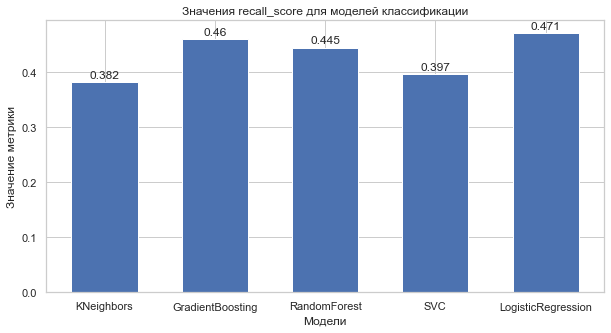

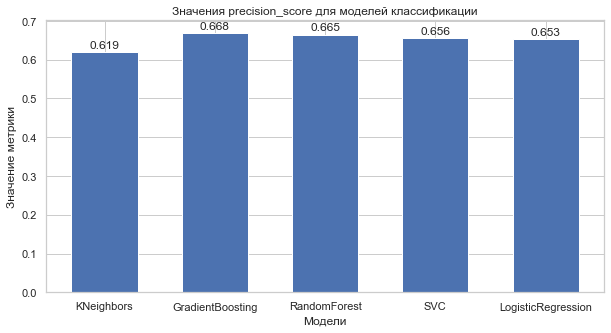

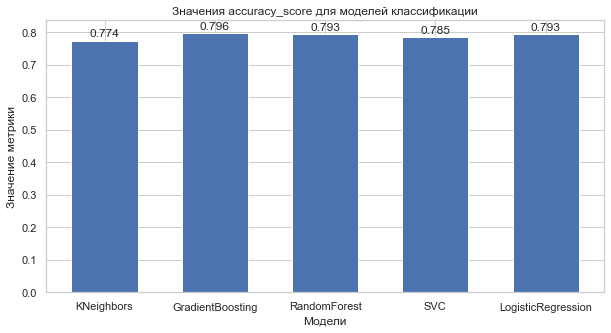

In [35]:
# Получение значений полноты моделей классификаторов
metrics_scores = [recall_score, precision_score, accuracy_score]
predicts = [knn_predict, gbc_predict, rfc_predict, svc_predict, lr_predict]
models_names = ['KNeighbors', 'GradientBoosting', 'RandomForest', 'SVC', 'LogisticRegression']
scores_names = ['recall_score', 'precision_score', 'accuracy_score']
values_list = []
for i, score in enumerate(metrics_scores):
    for predict in predicts:
        values_list.append(round(score(y_test, predict),3))    
    
    x = np.arange(len(models_names))  # Список координат столбцов по x
    
    fig, ax = plt.subplots(figsize=(10,5))  # Определение фигуры и осей
    rects = ax.bar(x, values_list, 0.6)  # Определение колонок для данных
    
    # Указание подписей для осей, таблицы, легенды
    ax.set_ylabel('Значение метрики')
    ax.set_xlabel('Модели')
    ax.set_title(f'Значения {scores_names[i]} для моделей классификации')
    ax.set_xticks(x)
    ax.set_xticklabels(models_names)
    
    # Определение функции для отображения столбцов с аннотациями
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            # Задание параметров для аннотаций
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height), # Получение точек координат для текста
                        xytext=(0, 2),    # Высота текста над столбцами
                        # Расположение текста относительно столбцов
                        textcoords="offset points",  
                        ha='center', va='bottom')
    
    autolabel(rects)  # Выполнение функции
    values_list = []

plt.show()

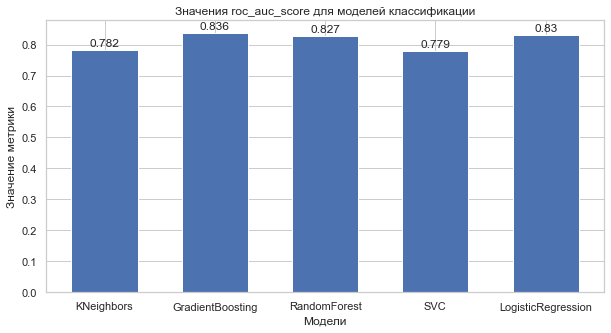

In [36]:
# Получение значений ROC-AUC score для моделей классификаторов

auc_list = []
models = [knn_model, gbc_model, rfc_model, svc_model, lr_model]
for model in models:
    proba = model.predict_proba(X_test)
    auc_list.append(round(roc_auc_score(y_test, proba[:, 1]),3))
    
x = np.arange(len(models_names))  # Список координат столбцов по x

fig, ax = plt.subplots(figsize=(10,5))  # Определение фигуры и осей
rects = ax.bar(x, auc_list, 0.6)  # Определение колонок для данных

# Указание подписей для осей, таблицы, легенды
ax.set_ylabel('Значение метрики')
ax.set_xlabel('Модели')
ax.set_title('Значения roc_auc_score для моделей классификации')
ax.set_xticks(x)
ax.set_xticklabels(models_names)

# Определение функции для отображения столбцов с аннотациями
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        # Задание параметров для аннотаций
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height), # Получение точек координат для текста
                    xytext=(0, 2),    # Высота текста над столбцами
                    # Расположение текста относительно столбцов
                    textcoords="offset points",  
                    ha='center', va='bottom')

autolabel(rects)  # Выполнение функции
values_list = []

plt.show()

Наибольшими показателями метрики качества roc_auc_score обладают модели классификаторов GradientBoosting, LogisticRegression и RandomForest.

Для того, чтобы улучшить анализ данных нужно расширить набор данных. 
Так же возможно дополнительно отсортировать клиентов по услугам.
Выявление наиболее востребованных услуг и параметров, которые привлекают клиентов , а так же пристальный анализ причин оттока клиентов поможет сделать анализ более качественным.

Добавление четкой визуализации зависимостей сделает анализ более читаемым и поможет лучше разобраться в причинах и следствиях оттока клиентов. 